In [88]:
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn import svm, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

%matplotlib inline

In [94]:
X = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv', header = None)
X_final = pd.read_csv('X_test.csv')

In [95]:
X.head(1)
X_final.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,21,Private,116657,HS-grad,9,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States
1,20,Private,258509,HS-grad,9,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
2,33,Private,135312,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States
3,35,Private,186934,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States
4,47,Self-emp-not-inc,243631,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,South


In [96]:
X_final.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [97]:
X_final['workclass'].value_counts()

Private             11014
Self-emp-not-inc     1278
Local-gov            1025
State-gov             614
Self-emp-inc          514
Federal-gov           468
Without-pay            11
Name: workclass, dtype: int64

In [112]:
X_final['private'] = X_final['workclass'].apply(lambda x: 1 if x == 'Private' else 0)
X_final['selfempnotinc'] = X_final['workclass'].apply(lambda x: 1 if x == 'Self-emp-not-inc' else 0)
X_final['localgov'] = X_final['workclass'].apply(lambda x: 1 if x == 'Local-gov' else 0)
X_final['stategov'] = X_final['workclass'].apply(lambda x: 1 if x == 'State-gov' else 0)
X_final['selfempinc'] = X_final['workclass'].apply(lambda x: 1 if x == 'Self-emp-inc' else 0)
X_final['fedgov'] = X_final['workclass'].apply(lambda x: 1 if x == 'Federal-gov' else 0)
X_final['withoutpay'] = X_final['workclass'].apply(lambda x: 1 if x == 'Without-pay' else 0)
del X_final['workclass']
del X_final['withoutpay']

In [113]:
del X_final['education']

In [59]:
X['marital-status'].value_counts()

Married-civ-spouse       14064
Never-married             9725
Divorced                  4262
Separated                  964
Widowed                    876
Married-spouse-absent      383
Married-AF-spouse           24
Name: marital-status, dtype: int64

In [114]:
X_final['married'] = X_final['marital-status'].apply(lambda x: 1 if x in ['Married-civ-spouse', \
                                            'Married-spouse-absent', 'Married-AF-spouse'] else 0)
X_final['single'] = X_final['marital-status'].apply(lambda x: 1 if x == 'Never-married' else 0)
X_final['divorced'] = X_final['marital-status'].apply(lambda x: 1 if x == 'Divorced' else 0)
X_final['separated'] = X_final['marital-status'].apply(lambda x: 1 if x == 'Separated' else 0)
X_final['widowed'] = X_final['marital-status'].apply(lambda x: 1 if x == 'Widowed' else 0)

del X_final['marital-status']
del X_final['widowed']

In [61]:
X['occupation'].value_counts()

Prof-specialty       4078
Exec-managerial      4016
Craft-repair         3996
Adm-clerical         3688
Sales                3604
Other-service        3229
Machine-op-inspct    1984
Transport-moving     1562
Handlers-cleaners    1372
Farming-fishing       995
Tech-support          948
Protective-serv       659
Priv-house-serv       159
Armed-Forces            8
Name: occupation, dtype: int64

In [115]:
X_final = pd.concat([X_final.drop(['occupation'], axis = 1), \
                             pd.get_dummies(X_final['occupation'])], axis = 1)
del X_final['Prof-specialty']

In [63]:
X['relationship'].value_counts()

Husband           12493
Not-in-family      7923
Own-child          4397
Unmarried          3175
Wife               1373
Other-relative      937
Name: relationship, dtype: int64

In [116]:
X_final = pd.concat([X_final.drop(['relationship'], axis = 1), \
                             pd.get_dummies(X_final['relationship'])], axis = 1)
del X_final['Husband']

In [65]:
X['race'].value_counts()

White                 26051
Black                  2857
Asian-Pac-Islander      876
Amer-Indian-Eskimo      272
Other                   242
Name: race, dtype: int64

In [117]:
X_final = pd.concat([X_final.drop(['race'], axis = 1), \
                             pd.get_dummies(X_final['race'])], axis = 1)
del X_final['White']

In [67]:
X['sex'].value_counts()

Male      20449
Female     9849
Name: sex, dtype: int64

In [118]:
X_final = pd.concat([X_final.drop(['sex'], axis = 1), \
                             pd.get_dummies(X_final['sex'])], axis = 1)
del X_final['Male']

In [69]:
X['native-country'].value_counts()

United-States                 27670
Mexico                          599
Philippines                     199
Germany                         136
Puerto-Rico                     111
Canada                          106
El-Salvador                     100
India                            95
Cuba                             94
England                          80
Dominican-Republic               71
South                            70
Jamaica                          69
China                            66
Guatemala                        66
Italy                            60
Japan                            58
Poland                           57
Columbia                         52
Vietnam                          52
Haiti                            48
Portugal                         48
Iran                             42
Taiwan                           40
Ecuador                          33
Nicaragua                        31
Peru                             30
Greece                      

In [119]:
X_final = pd.concat([X_final.drop(['native-country'], axis = 1), \
                              pd.get_dummies(X_final['native-country'])], axis = 1)
del X_final['United-States']

In [71]:
X.head(1)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,private,selfempnotinc,localgov,stategov,...,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,Vietnam,Yugoslavia
0,65,23580,13,0,0,40,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
del X['Holand-Netherlands']
cv = KFold(len(X), n_folds = 100, shuffle=False)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, \
                                                                     random_state=0)

KeyError: 'Holand-Netherlands'

In [136]:
lm = linear_model.LinearRegression()

lm.fit(X, y)

ValueError: could not convert string to float: United-States

In [83]:
lm.score

<bound method LinearRegression.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

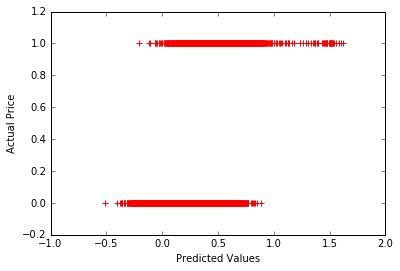

MSE: 0.117066316544


In [91]:
predictions = lm.predict(X_test)

# Plot the model
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Price")
plt.show()
print "MSE:", mean_squared_error(y_test, predictions)

In [120]:
y_final = pd.read_csv('y_test.csv', header = None)

In [123]:
len(X_final.columns)

78

In [129]:
len(X_train.columns)

79

In [121]:
predictions = lm.predict(X_final)

ValueError: shapes (14924,78) and (79,1) not aligned: 78 (dim 1) != 79 (dim 0)

In [126]:
X_final.columns

Index([u'age', u'fnlwgt', u'education-num', u'capital-gain', u'capital-loss',
       u'hours-per-week', u'private', u'selfempnotinc', u'localgov',
       u'stategov', u'selfempinc', u'fedgov', u'married', u'single',
       u'divorced', u'separated', u'Adm-clerical', u'Armed-Forces',
       u'Craft-repair', u'Exec-managerial', u'Farming-fishing',
       u'Handlers-cleaners', u'Machine-op-inspct', u'Other-service',
       u'Priv-house-serv', u'Protective-serv', u'Sales', u'Tech-support',
       u'Transport-moving', u'Not-in-family', u'Other-relative', u'Own-child',
       u'Unmarried', u'Wife', u'Amer-Indian-Eskimo', u'Asian-Pac-Islander',
       u'Black', u'Other', u'Female', u'Cambodia', u'Canada', u'China',
       u'Columbia', u'Cuba', u'Dominican-Republic', u'Ecuador', u'El-Salvador',
       u'England', u'France', u'Germany', u'Greece', u'Guatemala', u'Haiti',
       u'Honduras', u'Hong', u'Hungary', u'India', u'Iran', u'Ireland',
       u'Italy', u'Jamaica', u'Japan', u'Laos', u'Mex

In [128]:
X_train.columns

Index([u'age', u'fnlwgt', u'education-num', u'capital-gain', u'capital-loss',
       u'hours-per-week', u'private', u'selfempnotinc', u'localgov',
       u'stategov', u'selfempinc', u'fedgov', u'married', u'single',
       u'divorced', u'separated', u'Adm-clerical', u'Armed-Forces',
       u'Craft-repair', u'Exec-managerial', u'Farming-fishing',
       u'Handlers-cleaners', u'Machine-op-inspct', u'Other-service',
       u'Priv-house-serv', u'Protective-serv', u'Sales', u'Tech-support',
       u'Transport-moving', u'Not-in-family', u'Other-relative', u'Own-child',
       u'Unmarried', u'Wife', u'Amer-Indian-Eskimo', u'Asian-Pac-Islander',
       u'Black', u'Other', u'Female', u'Cambodia', u'Canada', u'China',
       u'Columbia', u'Cuba', u'Dominican-Republic', u'Ecuador', u'El-Salvador',
       u'England', u'France', u'Germany', u'Greece', u'Guatemala', u'Haiti',
       u'Holand-Netherlands', u'Honduras', u'Hong', u'Hungary', u'India',
       u'Iran', u'Ireland', u'Italy', u'Jamaica', u